# Importing libs

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the data
df = pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# checking the shape of the data 
df.shape

(614, 13)

data has 614 rows and 13 columns



# checking the datatypes

In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

8 attribute of Object datatype,4 attribute of float datatype and one attribute of integer data type

 one attribute which is Dependents needs to be check.

In [5]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [6]:
# gettiing the info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


data has missing values

In [7]:
# chechking null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

missing values in MarriedDependents,Gender,Self_Employed,LoanAmount,Loan_Amount_Term & Credit_History.

We need to fill nan values with mode,median and mean Values.

In [9]:
# Dropping unnecessary columns. Loan Id has no significance to predict our Loan Status.
df = df.drop(['Loan_ID'],axis=1)

In [10]:
# segregation columns into numeric and categorical
#for Numeric columns
num_df = df.select_dtypes(exclude='object')

#for categorical columns
obj_df = df.select_dtypes(include='object')

In [11]:
# value counts of all the object attributes
for col in obj_df:
    print('---------',col,'---------')
    print(obj_df[col].value_counts())

--------- Gender ---------
Male      489
Female    112
Name: Gender, dtype: int64
--------- Married ---------
Yes    398
No     213
Name: Married, dtype: int64
--------- Dependents ---------
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
--------- Education ---------
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
--------- Self_Employed ---------
No     500
Yes     82
Name: Self_Employed, dtype: int64
--------- Property_Area ---------
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
--------- Loan_Status ---------
Y    422
N    192
Name: Loan_Status, dtype: int64


In [13]:
# stats summary
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1-We can see that our data is right skewed & left skewed both.

2- Applicant Income,co applicant Income are Right skewed because Mean Is greater than Median values.

3- loan Amount & Loan_amount term are left skewed because Median is greater than Mean values.

4- we can see there are outliers are present in our dataset because difference between the value of 3rd quantile and maximun values is more.

In [14]:
# checking value counts for credit history
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [15]:
# filling null values with the MODE values in categorical column
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [16]:
## filling null values with Median values in float dataypes.
## We have put 1 in credit History attribute because it appears maximun times in our dataset.
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History']=df['Credit_History'].replace(np.nan,1)

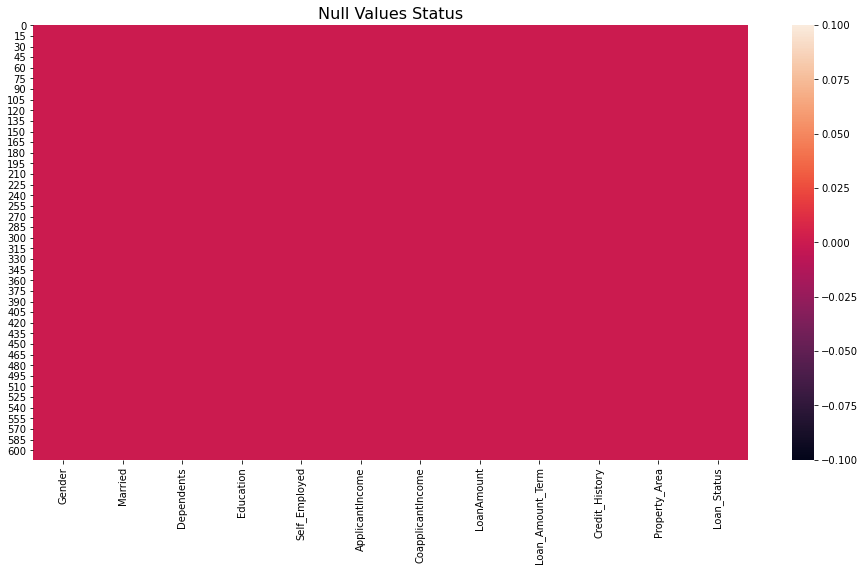

In [17]:
# ploting heatmapfor showing null values status
plt.figure(figsize=(16,8))
plt.title('Null Values Status',fontsize=16)
sns.heatmap(df.isnull());

sucessfully fill all our null values. now there is no null values present in our dataset.

## correlation Plot


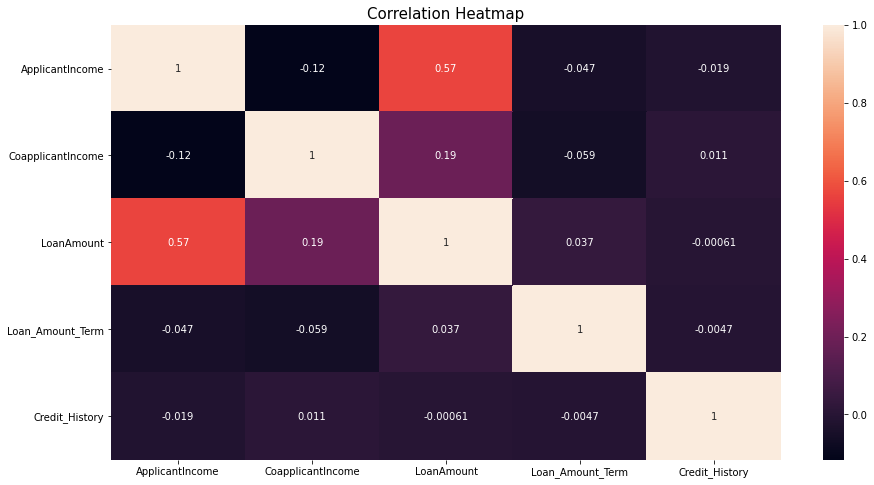

In [19]:
plt.figure(figsize=(15,8))
plt.title('Correlation Heatmap',fontsize=15)
sns.heatmap(df.corr(),annot=True);


1- Our Loan amount is highly correlated with Applicant Income which is .57.

2- Neither the strong positive nor the strong negative correlation present in any variable.

# Data Visualization

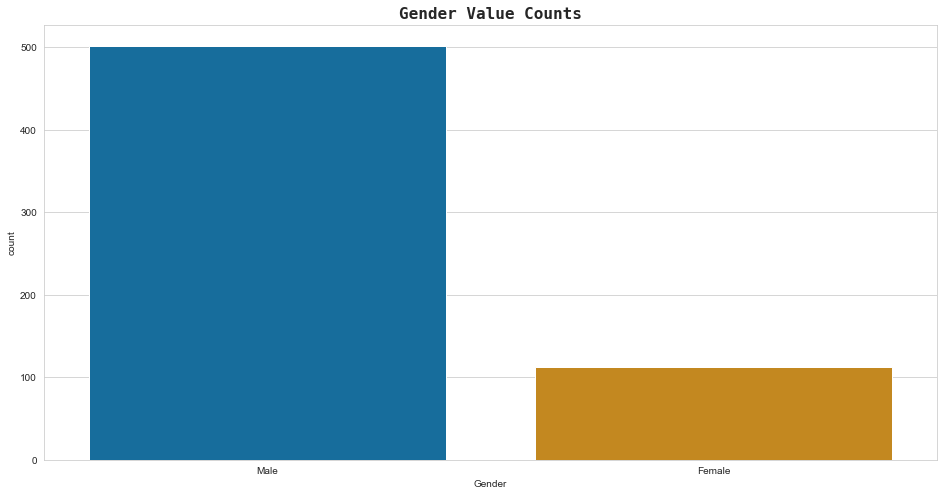

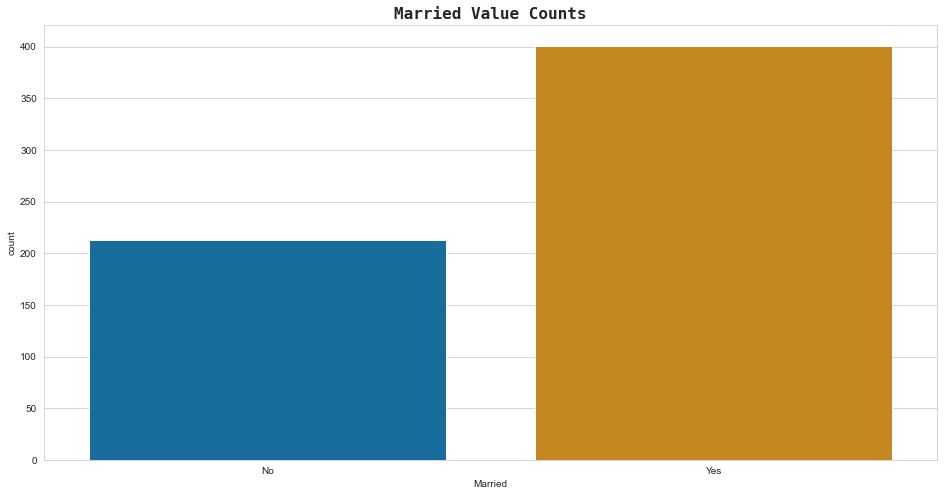

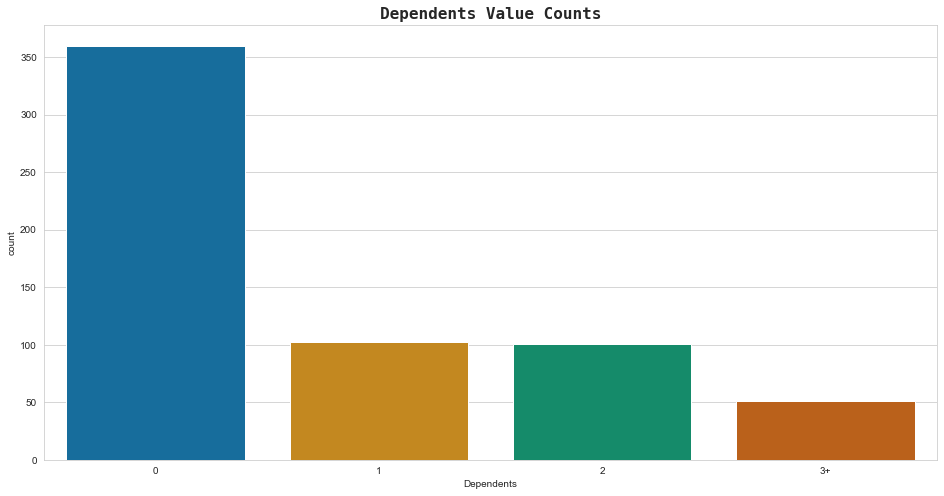

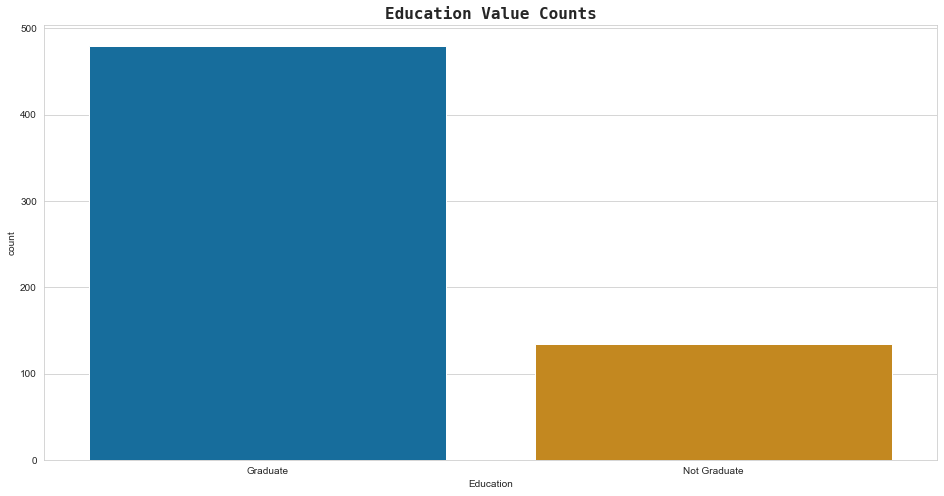

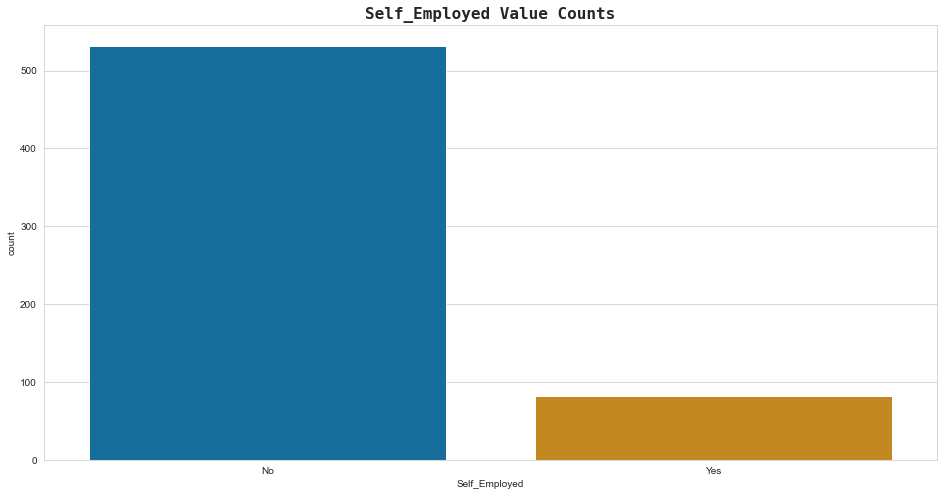

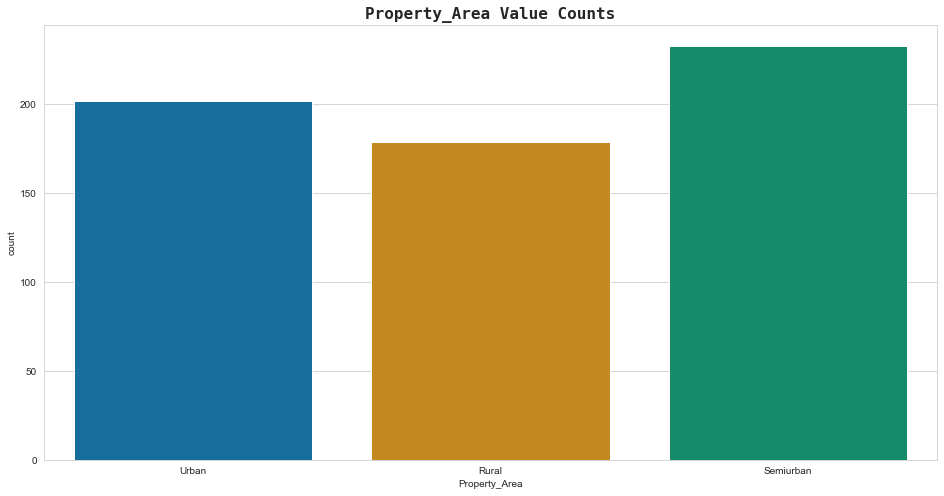

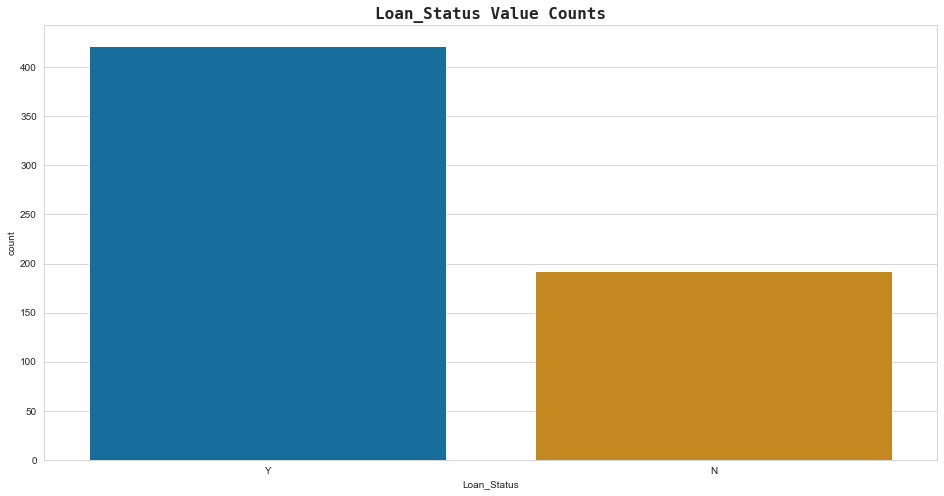

In [20]:
for col in obj_df:
    sns.set_style('whitegrid')
    plt.figure(figsize=(16,8))
    plt.title(col+' Value Counts',fontsize=16,fontname='Monospace',fontweight='bold')
    x=sns.countplot(df[col],palette='colorblind',data=df)
    plt.show();

Around 82% applicants are male in the dataset.

Approx. 47% applicants are married.

Majority applicants have zero dependents in our dataset.

The not graduated applicants are below the half of the count of the applicants who are graduated.

Around 16% applicants are self employed.

most of loan applicant belong from semiurban area. 7- Our Target attribute is almost balance as it has 55:45 ratio.

# Bi-variate Analysis

In [21]:
## Creating a function
def relation_target(df,col):
    plt.figure(figsize=(15,6))
    plt.title(col+' Vs Loan_Status ',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
    sns.countplot(x =col, hue ="Loan_Status",palette='colorblind' ,data = df)
    plt.plot()

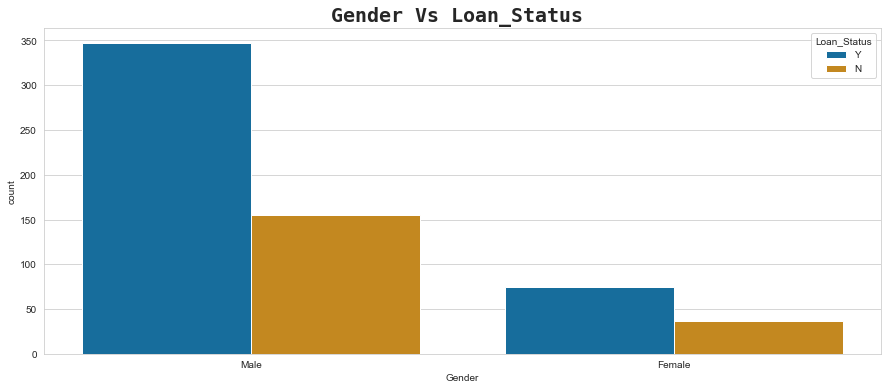

In [22]:
relation_target(df,'Gender')

 Mostly Males sanctioned for loan as compaired to Females.

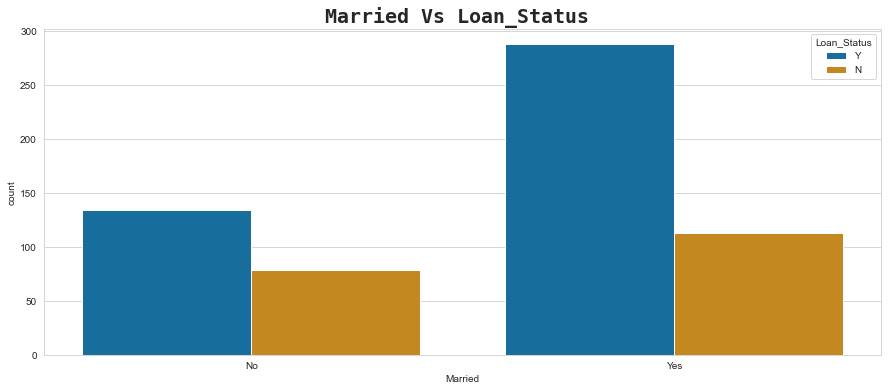

In [23]:
relation_target(df,'Married')

Around 300 applicants are married whose loans are approved as compared to the applicants who are not married but their loans were approved

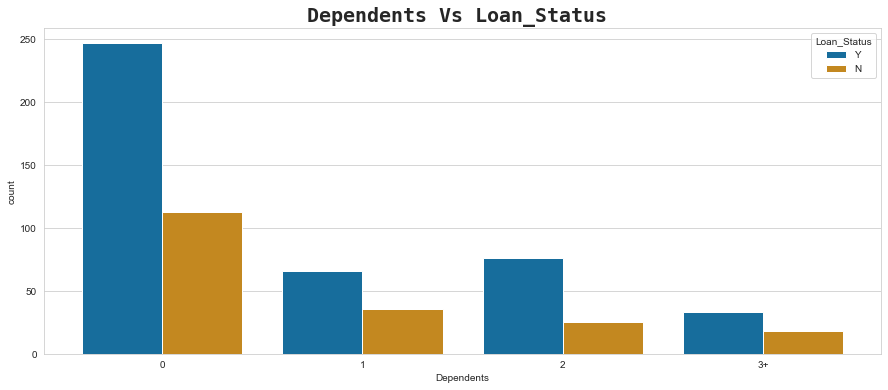

In [24]:
relation_target(df,'Dependents')

Majority of the applicants whose loans are approved have no or 0 dependency & the minimun loan approved to those who has higher number of dependents.

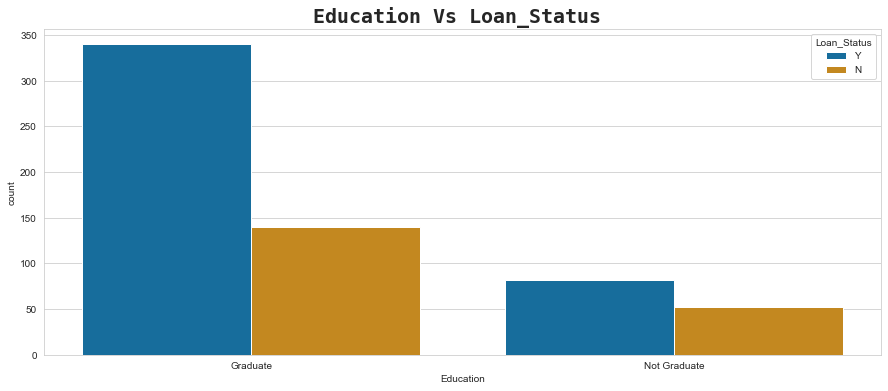

In [25]:
relation_target(df,'Education')

The count of graduates whose loans are approved is high as compared to the non graduates having approved loans.

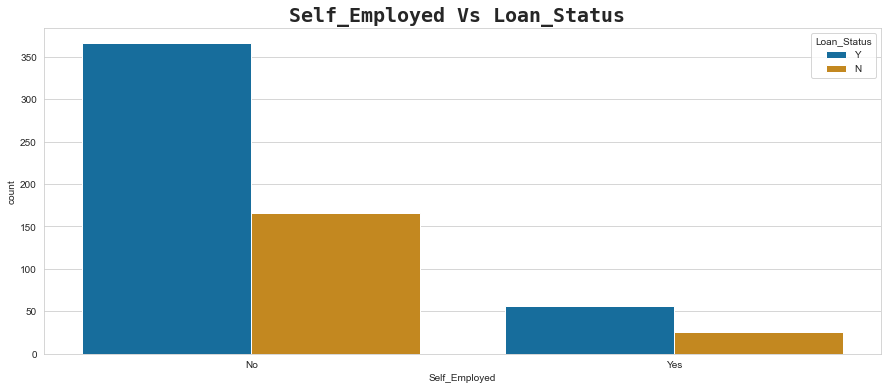

In [26]:
relation_target(df,'Self_Employed')

The percentage of self-employed applicants having approved loans is around 15% of the non self employed applicants having approved loans.

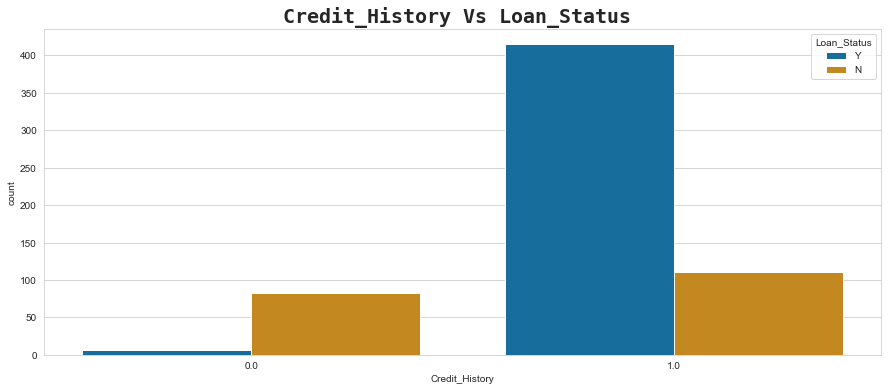

In [27]:
relation_target(df,'Credit_History')

People who has credit history 1 has the highest loan approval as compared to 0 credit history. People Who has zero credit score mostly they are denied to grant loan.

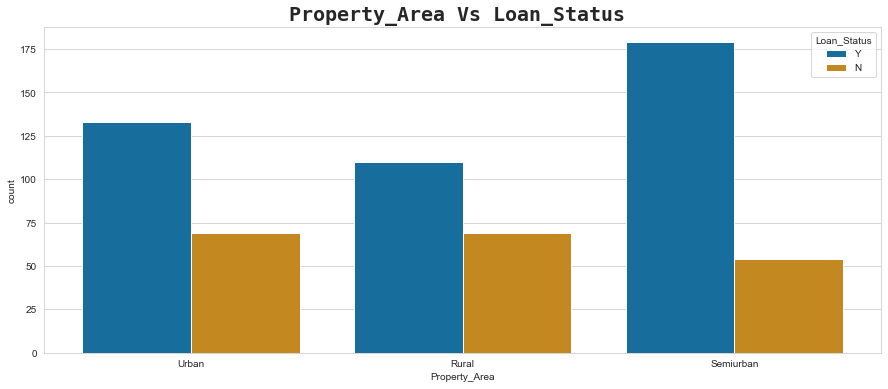

In [29]:
relation_target(df,'Property_Area')

The max. no. of applicants whose loans are approved belongs to or having property in semi-urban area.

In [30]:
num_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [31]:
def barplot_target(df,col):
    plt.figure(figsize=(15,6))
    plt.title(col+' Vs Loan_Status ',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
    sns.barplot(y =col, x="Loan_Status",palette='colorblind' ,data = df)
    plt.plot()

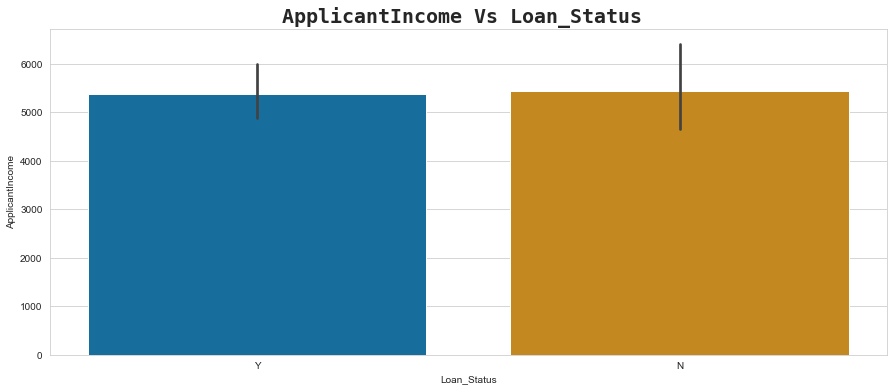

In [32]:
barplot_target(df,'ApplicantIncome')

There is almost similar income of people who sanction loans/ denied. Applicant income has no significance to decide whether loan will approve or not.

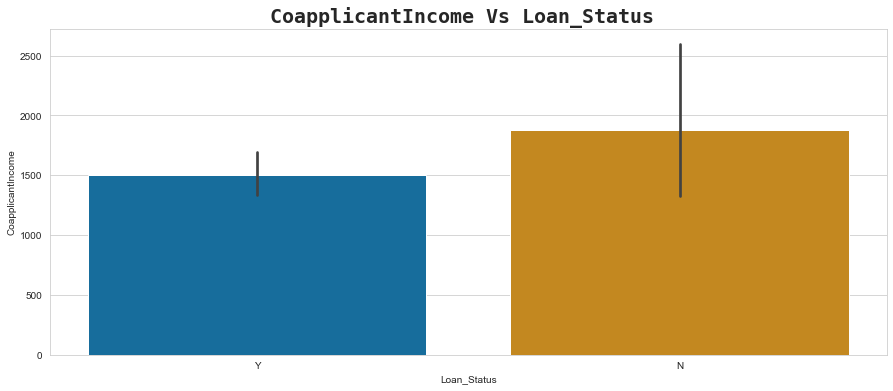

In [34]:
barplot_target(df,'CoapplicantIncome')

We can observe that, if co applicant income is higher than 1500, there are chances of denial to loan.

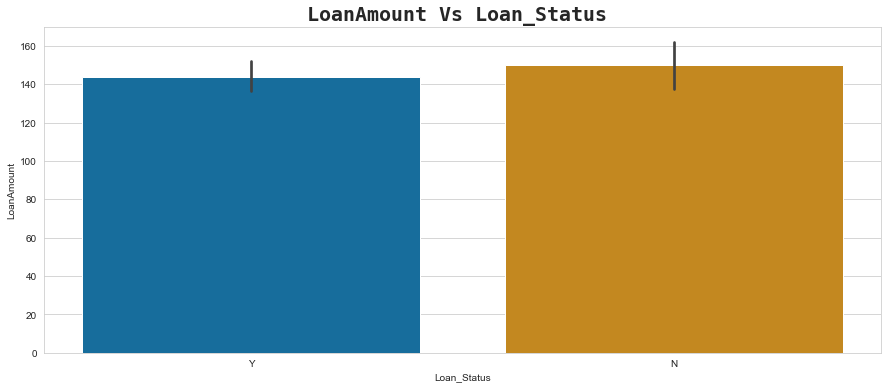

In [35]:
barplot_target(df,'LoanAmount')

There is almost similar trend regarding Loan Amount. There is no relation between Loan Amount and Loan Status.

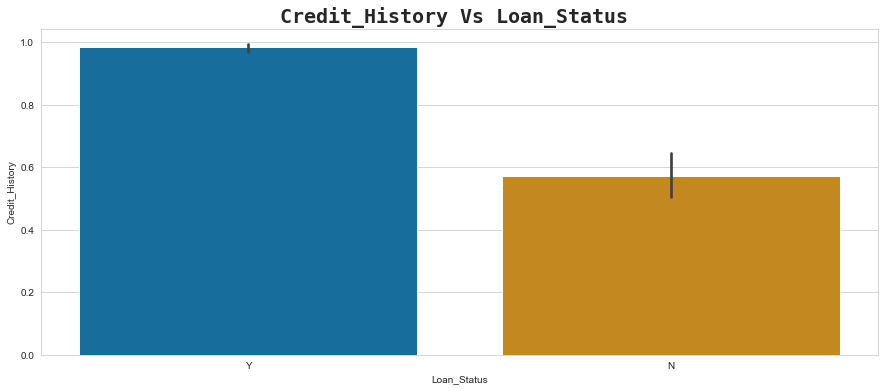

In [36]:
barplot_target(df,'Credit_History')

 we can see that a person who has credit history one has highest loan approval rate

## Relation With Applicant Income and Other Attributes

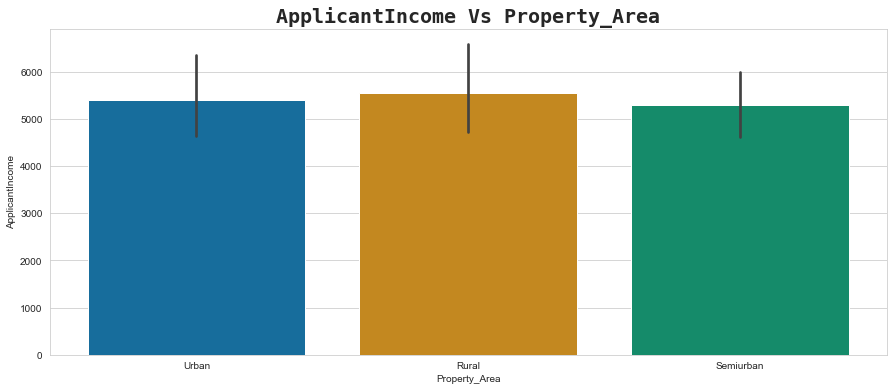

In [39]:
plt.figure(figsize=(15,6))
plt.title('ApplicantIncome Vs Property_Area',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.barplot(y ='ApplicantIncome', x="Property_Area",palette='colorblind' ,data = df)
plt.plot();

there is almost similar income status of applicants belong from different regions.

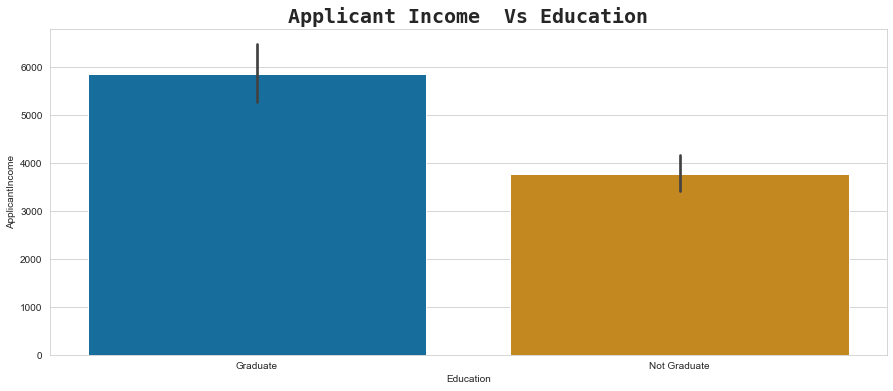

In [40]:
plt.figure(figsize=(15,6))
plt.title('Applicant Income  Vs Education',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.barplot(y ='ApplicantIncome', x="Education",palette='colorblind' ,data = df)
plt.plot();

Graduate Applicant's income is higher than non Graduate Applicants.

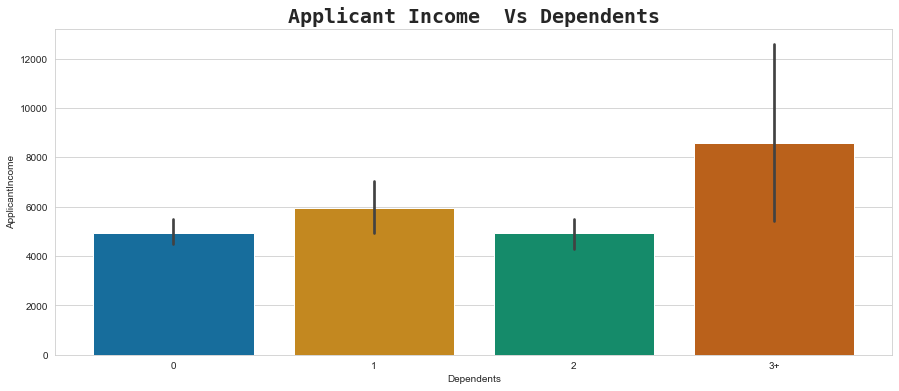

In [41]:
plt.figure(figsize=(15,6))
plt.title('Applicant Income  Vs Dependents',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.barplot(y ='ApplicantIncome', x="Dependents",palette='colorblind' ,data = df)
plt.plot();

The Applicant who has maximum number of depenents has higher income (8000+).

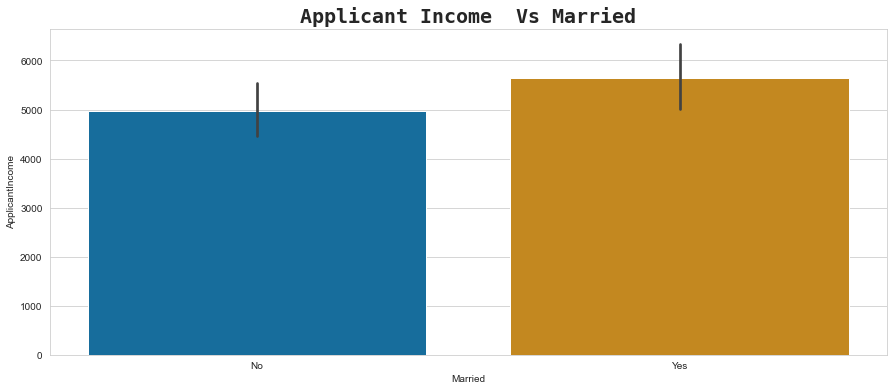

In [43]:
plt.figure(figsize=(15,6))
plt.title('Applicant Income  Vs Married',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.barplot(y ='ApplicantIncome', x="Married",palette='colorblind' ,data = df)
plt.plot();

The Applicant who are married has higher income as compared to unmarried applicants.

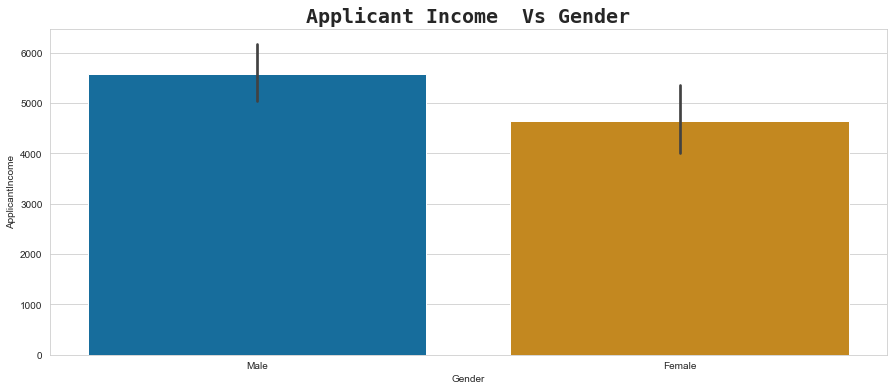

In [44]:
plt.figure(figsize=(15,6))
plt.title('Applicant Income  Vs Gender',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.barplot(y ='ApplicantIncome', x="Gender",palette='colorblind' ,data = df)
plt.plot();

Male applicant's income is higher than the female applicants.

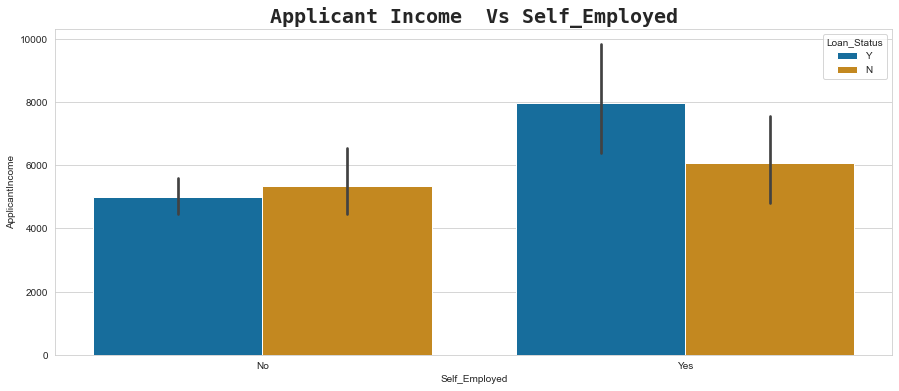

In [45]:
plt.figure(figsize=(15,6))
plt.title('Applicant Income  Vs Self_Employed',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.barplot(y ='ApplicantIncome', x="Self_Employed",hue='Loan_Status',palette='colorblind' ,data = df)
plt.plot();

the person who are self employed are earning well and their loan approval rate is also high as compared to non-self employed.

## Plotting a pair plot

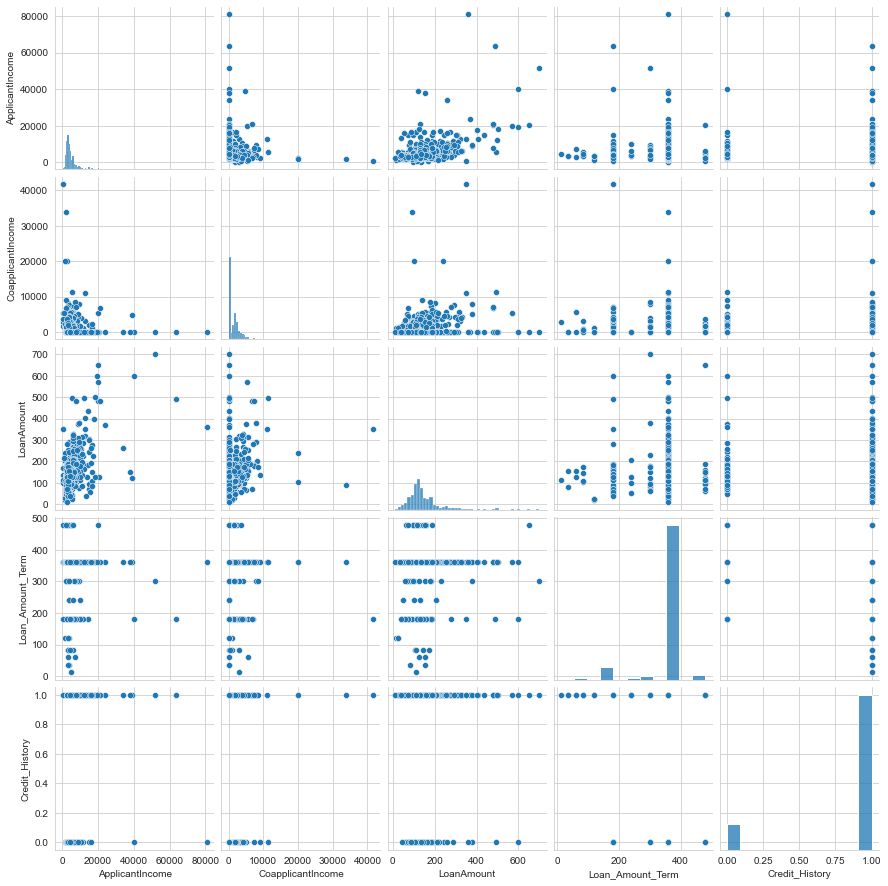

In [47]:
sns.pairplot(df);

## Data Distribution

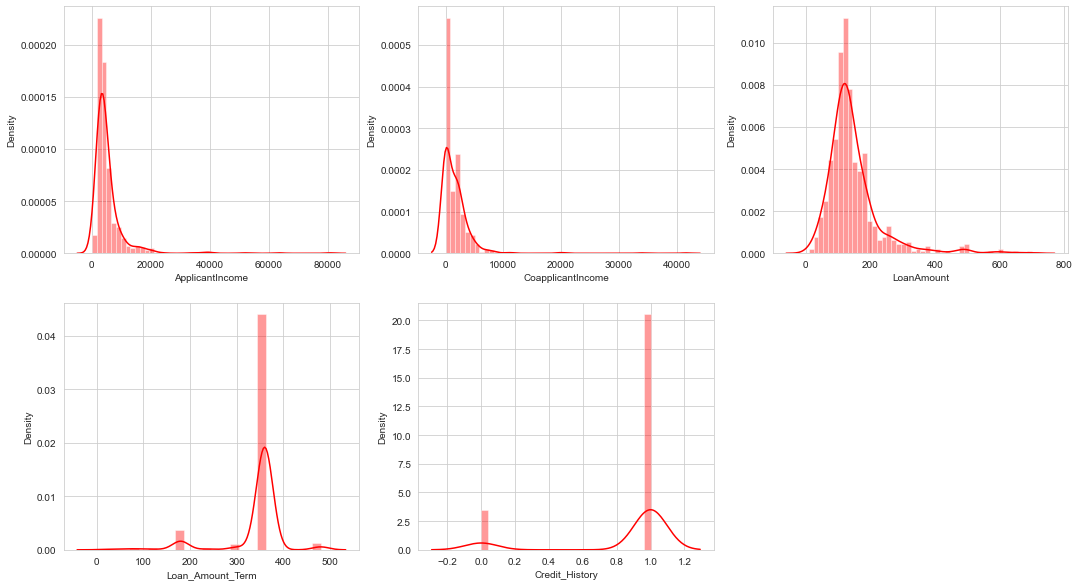

In [48]:
plt.figure(figsize=(18,10))
plot=1
for col in num_df:
    if plot<=6:
        plt.subplot(2,3,plot)
        sns.distplot(df[col],color='red')
        plt.xlabel(col)
        plot=plot+1
plt.show();

1-We could see that applicants income, Co-applicants income, Laon Amount are right skewed.

2- Laon Amount Term has majority values of 360 months.

3- Credit history has only two values (0 or ). In which majority values are One.

## Outliers Detection

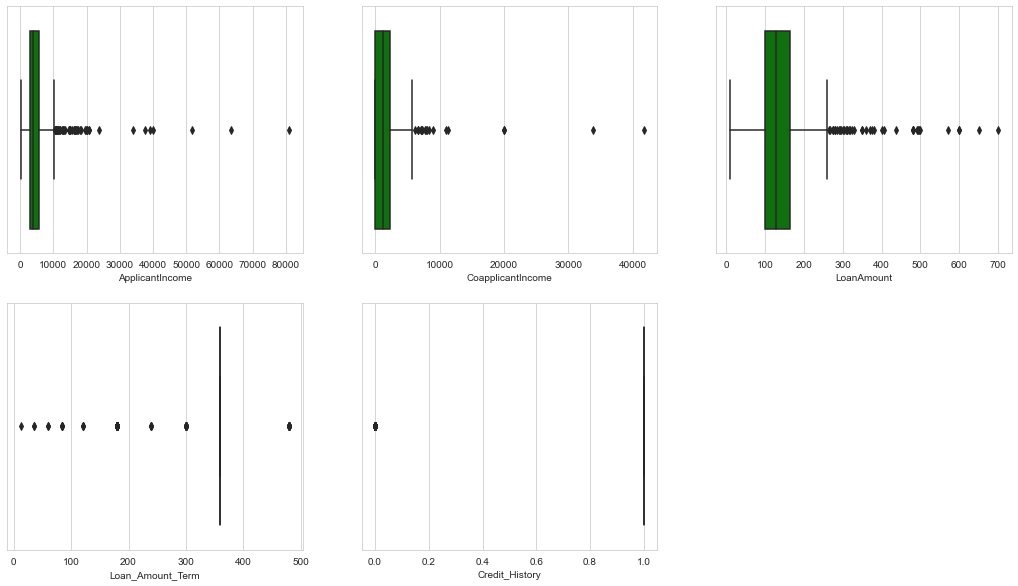

In [53]:
plt.figure(figsize=(18,10))
plot=1
for col in num_df:
    if plot<=6:
        plt.subplot(2,3,plot)
        sns.boxplot(df[col],color='green')
        plt.xlabel(col)
        plot=plot+1
plt.show();

Outliers are present in Appilcants Income, Coapplicants Income and Loan Amounts.

## Fixing Outliers 

In [59]:
## when data is normally distributed.
def fixing_outlier(df,col):
    IQR=df[col].quantile(.75)-df[col].quantile(.25)
    lower_limit=df[col].quantile(.25)-(1.5*IQR)
    upper_limit=df[col].quantile(.75)+(1.5*IQR)
    non_outlier=np.where((df[col]<lower_limit )|(df[col]>upper_limit),df[col].median(),df[col])
    df[col]=non_outlier
    plt.subplot(1,2,1)
    sns.distplot(df[col])
    plt.subplot(1,2,2)
    sns.boxplot(df[col])

In [60]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

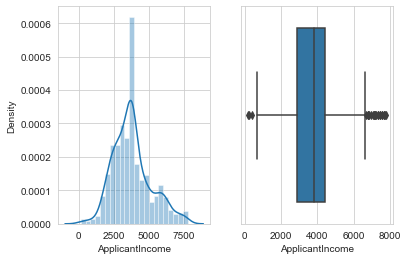

In [61]:
fixing_outlier(df,'ApplicantIncome')

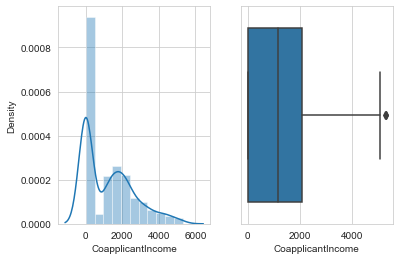

In [62]:
fixing_outlier(df,'CoapplicantIncome')

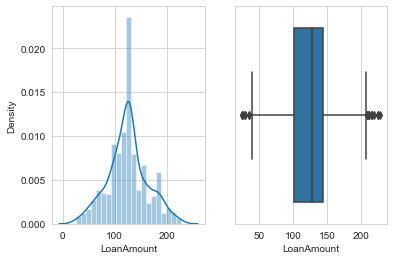

In [63]:
fixing_outlier(df,'LoanAmount')

sucesfully replace our outliers from Applicant income,Co applicant Income & Loan Amount.

## Skewness Time

In [64]:
df_1=df.copy()
df_1.skew()

ApplicantIncome      0.595566
CoapplicantIncome    0.848197
LoanAmount           0.082161
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [65]:
df_1['ApplicantIncome']=np.sqrt(df_1['ApplicantIncome'])
df_1['CoapplicantIncome']=np.sqrt(df_1['CoapplicantIncome'])
df_1.skew()

ApplicantIncome     -0.119688
CoapplicantIncome    0.125902
LoanAmount           0.082161
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

removed skewness to its possible extent.

## Label Encoding


In [66]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in obj_df:
    df_1[col]=le.fit_transform(df_1[col])

In [67]:
df_1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,76.478755,0.000000,128.0,360.0,1.0,2,1
1,1,1,1,0,0,67.697858,38.832976,128.0,360.0,1.0,0,0
2,1,1,0,0,1,54.772256,0.000000,66.0,360.0,1.0,2,1
3,1,1,0,1,0,50.823223,48.559242,120.0,360.0,1.0,2,1
4,1,0,0,0,0,77.459667,0.000000,141.0,360.0,1.0,2,1


## Splitting Data into Input and Output Variable

In [68]:
x=df_1.drop(['Loan_Status'],axis=1)
y=df_1[['Loan_Status']]

In [69]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,76.478755,0.000000,128.0,360.0,1.0,2
1,1,1,1,0,0,67.697858,38.832976,128.0,360.0,1.0,0
2,1,1,0,0,1,54.772256,0.000000,66.0,360.0,1.0,2
3,1,1,0,1,0,50.823223,48.559242,120.0,360.0,1.0,2
4,1,0,0,0,0,77.459667,0.000000,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,53.851648,0.000000,71.0,360.0,1.0,0
610,1,1,3,0,0,64.078077,0.000000,40.0,180.0,1.0,0
611,1,1,1,0,0,61.743421,15.491933,128.0,360.0,1.0,2
612,1,1,2,0,0,87.080423,0.000000,187.0,360.0,1.0,2


In [70]:
y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


## Feature Scaling


In [71]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,1.423491,-1.048223,0.087502,0.273231,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.640726,0.552292,0.087502,0.273231,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.511514,-1.048223,-1.544557,0.273231,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.863546,0.953164,-0.123086,0.273231,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,1.510933,-1.048223,0.429708,0.273231,0.411733,1.223298
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.593581,-1.048223,-1.412939,0.273231,0.411733,-1.318513
610,0.472343,0.728816,2.236021,-0.528362,-0.392601,0.318045,-1.048223,-2.228969,-2.522836,0.411733,-1.318513
611,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.109924,-0.409717,0.087502,0.273231,0.411733,1.223298
612,0.472343,0.728816,1.244745,-0.528362,-0.392601,2.368566,-1.048223,1.640591,0.273231,0.411733,1.223298


## Feature Importance


In [72]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(x,y)

ExtraTreesClassifier()

In [73]:
print(extra.feature_importances_)

[0.02379203 0.02006302 0.06439765 0.02395372 0.02392469 0.18746639
 0.10408072 0.17461886 0.04944507 0.27615368 0.05210418]


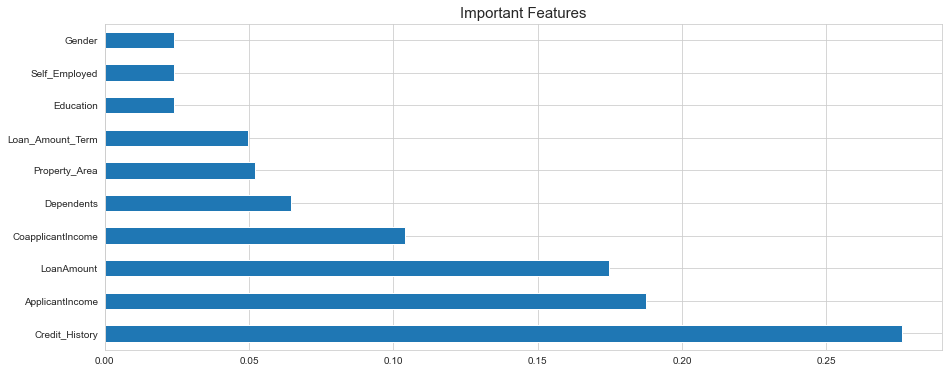

In [74]:
plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=x.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show();

## Model Building time

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc
from imblearn.over_sampling import SMOTE

In [87]:
def model_run(clf,x,y):
    max_accuracy=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i,stratify=y)
        #x_train,y_train=SMOTE().fit_resample(x_train,y_train) ##over sampling of our Data
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        accuracy_check=accuracy_score(y_test,pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max accuracy score corresponding to',final_r,'is',max_accuracy*100)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='accuracy').mean()*100)
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='accuracy').std()*100)
    print('\n')
    print('F1 score',f1_score(y_test,pred)*100)
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train)*100)
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test)*100)
    print('\n')
    print('Confusion Matrix',confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report',classification_report(y_test,pred))
    print('\n')
    print('Roc_auc Score',roc_auc_score(y_test,pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")
    return final_r

## Logistic Regression


max accuracy score corresponding to 76 is 86.1788617886179


cross validation score 80.78235372517659


Standard Deviation 2.6964969382167303


F1 score 90.3225806451613


Training accuracy 79.83706720977597


Test Accuracy 85.36585365853658


Confusion Matrix [[21 17]
 [ 1 84]]


Classification Report               precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



Roc_auc Score 0.7704334365325077





76

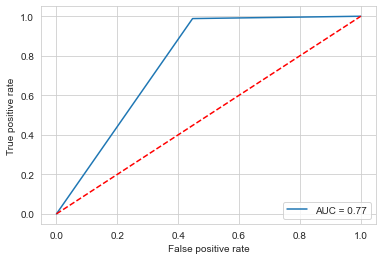

In [78]:
lg=LogisticRegression()
model_run(lg,x,y)

## Decision Tree

max accuracy score corresponding to 65 is 76.42276422764228


cross validation score 68.40330534452886


Standard Deviation 1.9134592635081857


F1 score 80.74534161490683


Training accuracy 100.0


Test Accuracy 74.79674796747967


Confusion Matrix [[27 11]
 [20 65]]


Classification Report               precision    recall  f1-score   support

           0       0.57      0.71      0.64        38
           1       0.86      0.76      0.81        85

    accuracy                           0.75       123
   macro avg       0.71      0.74      0.72       123
weighted avg       0.77      0.75      0.75       123



Roc_auc Score 0.7376160990712075





65

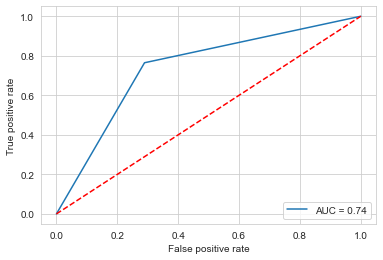

In [79]:
dt = DecisionTreeClassifier()
model_run(dt,x,y)

## KNN

max accuracy score corresponding to 49 is 83.73983739837398


cross validation score 77.84886045581769


Standard Deviation 2.276694302174559


F1 score 86.02150537634408


Training accuracy 80.65173116089613


Test Accuracy 78.86178861788618


Confusion Matrix [[17 21]
 [ 5 80]]


Classification Report               precision    recall  f1-score   support

           0       0.77      0.45      0.57        38
           1       0.79      0.94      0.86        85

    accuracy                           0.79       123
   macro avg       0.78      0.69      0.71       123
weighted avg       0.79      0.79      0.77       123



Roc_auc Score 0.6942724458204335





49

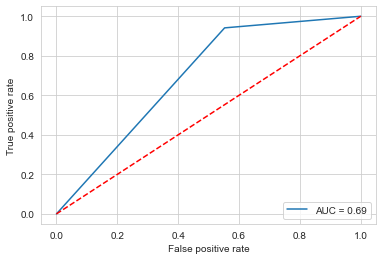

In [80]:
knn = KNeighborsClassifier()
model_run(knn,x,y)

## Naive Bayes

max accuracy score corresponding to 76 is 86.1788617886179


cross validation score 80.62108489937359


Standard Deviation 2.9127219676682397


F1 score 90.3225806451613


Training accuracy 79.83706720977597


Test Accuracy 85.36585365853658


Confusion Matrix [[21 17]
 [ 1 84]]


Classification Report               precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



Roc_auc Score 0.7704334365325077





76

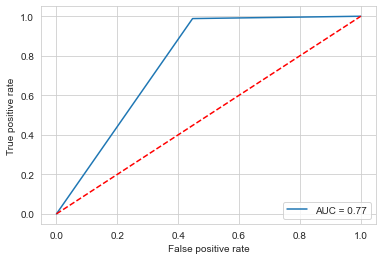

In [81]:
gnb = GaussianNB()
model_run(gnb,x,y)

## Random Forest

max accuracy score corresponding to 89 is 83.73983739837398


cross validation score 77.52499000399841


Standard Deviation 2.5222327608884676


F1 score 85.55555555555556


Training accuracy 100.0


Test Accuracy 78.86178861788618


Confusion Matrix [[20 18]
 [ 8 77]]


Classification Report               precision    recall  f1-score   support

           0       0.71      0.53      0.61        38
           1       0.81      0.91      0.86        85

    accuracy                           0.79       123
   macro avg       0.76      0.72      0.73       123
weighted avg       0.78      0.79      0.78       123



Roc_auc Score 0.7160990712074303





89

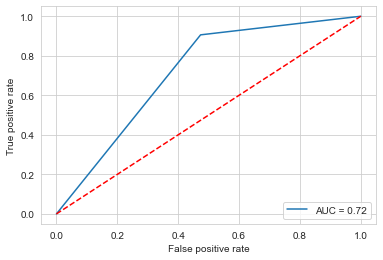

In [82]:
rf = RandomForestClassifier()
model_run(rf,x,y)

## AdaBoost

max accuracy score corresponding to 49 is 82.92682926829268


cross validation score 78.17806210848993


Standard Deviation 2.468544611598278


F1 score 87.9120879120879


Training accuracy 83.29938900203666


Test Accuracy 82.11382113821138


Confusion Matrix [[21 17]
 [ 5 80]]


Classification Report               precision    recall  f1-score   support

           0       0.81      0.55      0.66        38
           1       0.82      0.94      0.88        85

    accuracy                           0.82       123
   macro avg       0.82      0.75      0.77       123
weighted avg       0.82      0.82      0.81       123



Roc_auc Score 0.7469040247678018





49

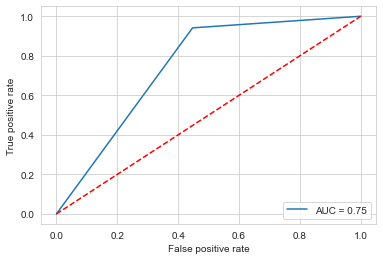

In [83]:
adb = AdaBoostClassifier()
model_run(adb,x,y)

## Gradient Boost

max accuracy score corresponding to 76 is 83.73983739837398


cross validation score 77.85552445688391


Standard Deviation 2.98487265732377


F1 score 85.71428571428571


Training accuracy 88.39103869653768


Test Accuracy 78.86178861788618


Confusion Matrix [[19 19]
 [ 7 78]]


Classification Report               precision    recall  f1-score   support

           0       0.73      0.50      0.59        38
           1       0.80      0.92      0.86        85

    accuracy                           0.79       123
   macro avg       0.77      0.71      0.73       123
weighted avg       0.78      0.79      0.78       123



Roc_auc Score 0.7088235294117646





76

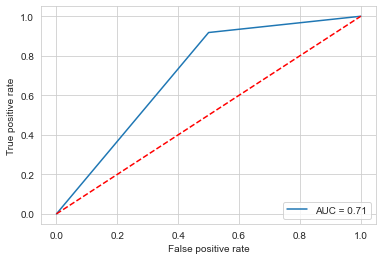

In [84]:
gb = GradientBoostingClassifier()
model_run(gb,x,y)

It is clear that Logistic Regression is Most generalised model among all because the difference between Accuracy Score and cross validation score is miminum as compared to other models. So this would be our best model.

## Hyper Parameter Tuning

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=76,test_size=.20,stratify=y)
lg=LogisticRegression()
param={'penalty':['l2','l1','elasticnet'],'C':[.001,.01,.1,1,10],'solver':['newton-cg','lbfgs','liblinear','sag','saga'],'max_iter':[50,100,200]}

grid=GridSearchCV(estimator=lg,param_grid=param,scoring='accuracy',n_jobs=-1)

grid.fit(x_train,y_train)

grid.best_params_

{'C': 0.001, 'max_iter': 50, 'penalty': 'l2', 'solver': 'liblinear'}

In [90]:
lg_final=LogisticRegression(C= 0.001,max_iter=50,penalty='l2',solver='liblinear')
lg_final.fit(x_train,y_train)
pred=lg_final.predict(x_test)
print('Final Accuracy_score :',accuracy_score(pred,y_test)*100)
print('\n')
print('Final f_1 score :',f1_score(pred,y_test)*100)
print('\n')
print('Final roc_auc score :',roc_auc_score(pred,y_test)*100)
print('\n')
print('Final classification Report :',classification_report(pred,y_test))
print('\n')
print('Final confusion Matrix :',confusion_matrix(pred,y_test))

Final Accuracy_score : 86.1788617886179


Final f_1 score : 90.9090909090909


Final roc_auc score : 91.66666666666667


Final classification Report :               precision    recall  f1-score   support

           0       0.55      1.00      0.71        21
           1       1.00      0.83      0.91       102

    accuracy                           0.86       123
   macro avg       0.78      0.92      0.81       123
weighted avg       0.92      0.86      0.88       123



Final confusion Matrix : [[21  0]
 [17 85]]


we can see that by hyperparameter tuning our F1 score and Roc_auc score has improved. Our Accuracy score remained same. Hence we will save this as our best model

## Saving Model

In [92]:
import joblib
joblib.dump(lg_final,'Loan_status_lg.pkl')

['Loan_status_lg.pkl']

## Loading Model

In [93]:
loaded_model=joblib.load('Loan_status_lg.pkl')
prediction=loaded_model.predict(x_test)
prediction

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

## ;) ##